# 1. Problem: Implement a Python function to calculate the mean squared error (MSE)  between two lists of predicted and actual value

In [1]:
def calculate_mse(actual, predicted):
    n = len(actual)
    mse = sum((a - p) ** 2 for a, p in zip(actual, predicted)) / n
    return mse

actual_values = [3, -0.5, 2, 7]
predicted_values = [2.5, 0.0, 2, 8]

mse = calculate_mse(actual_values, predicted_values)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.375


#  2. Problem: Write a function to generate synthetic data using the Gaussian mixture model (GMM) algorithm from scratch. The function should return clusters of data points.

In [2]:
import numpy as np

def generate_synthetic_data_gmm(n_points, means, covariances, weights):
    n_clusters = len(means)
    clusters = []
    
    for i in range(n_clusters):
        n_cluster_points = int(n_points * weights[i])
        cluster_points = np.random.multivariate_normal(means[i], covariances[i], n_cluster_points)
        clusters.append(cluster_points)
    
    return np.vstack(clusters)

means = [[1, 1], [5, 5], [9, 9]]
covariances = [[[1, 0], [0, 1]], [[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]
weights = [0.3, 0.4, 0.3]
n_points = 500

data = generate_synthetic_data_gmm(n_points, means, covariances, weights)
print(data[:5])  # Print first 5 generated data points


[[ 0.87435981  1.71951193]
 [ 3.11320038  2.99835213]
 [ 3.30758202 -0.83713635]
 [ 1.22059806  2.07739707]
 [ 0.68165413  1.47357429]]


#  3. Problem: Implement a Python function to apply batch normalization to a layer's activations in a neural network.

In [3]:
import numpy as np

def batch_normalization(x, gamma, beta, epsilon=1e-5):
    mean = np.mean(x, axis=0)
    variance = np.var(x, axis=0)
    
    x_normalized = (x - mean) / np.sqrt(variance + epsilon)
    output = gamma * x_normalized + beta
    
    return output

# Example usage
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
gamma = np.ones(x.shape[1])
beta = np.zeros(x.shape[1])

normalized_output = batch_normalization(x, gamma, beta)
print("Batch Normalized Output:\n", normalized_output)


Batch Normalized Output:
 [[-1.22474385 -1.22474385 -1.22474385]
 [ 0.          0.          0.        ]
 [ 1.22474385  1.22474385  1.22474385]]


# 4. Problem: Write a function to calculate the Jaccard similarity between two sets, often used in text mining and natural language processing tasks.

In [4]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Example usage
set1 = {"apple", "banana", "cherry"}
set2 = {"banana", "cherry", "date"}

similarity = jaccard_similarity(set1, set2)
print("Jaccard Similarity:", similarity)


Jaccard Similarity: 0.5


# 5. Problem: Implement the stochastic gradient descent (SGD) algorithm for training a logistic regression model.

In [5]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def sgd_logistic_regression(X, y, lr=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for epoch in range(epochs):
        for i in range(n_samples):
            linear_model = np.dot(X[i], weights) + bias
            y_pred = sigmoid(linear_model)
            
            dw = (y_pred - y[i]) * X[i]
            db = y_pred - y[i]
            
            weights -= lr * dw
            bias -= lr * db
        
        if epoch % 100 == 0:
            y_pred_all = sigmoid(np.dot(X, weights) + bias)
            loss = compute_loss(y, y_pred_all)
            print(f'Epoch {epoch}, Loss: {loss}')
    
    return weights, bias

# Example usage
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Example features
y = np.array([0, 0, 1, 1])  # Example binary labels

weights, bias = sgd_logistic_regression(X, y)
print("Trained weights:", weights)
print("Trained bias:", bias)


Epoch 0, Loss: 0.6738202199158428
Epoch 100, Loss: 0.5420420268802115
Epoch 200, Loss: 0.46435187884500195
Epoch 300, Loss: 0.4070210787524631
Epoch 400, Loss: 0.3635911900399638
Epoch 500, Loss: 0.32978395574707187
Epoch 600, Loss: 0.30279119425450296
Epoch 700, Loss: 0.2807480033585889
Epoch 800, Loss: 0.2623902352081956
Epoch 900, Loss: 0.246840651599739
Trained weights: [ 2.32668204 -0.69940598]
Trained bias: -3.0260880256176055


# 6. Problem: Write a Python function to perform the backpropagation step for a simple feedforward neural network with one hidden layer.

In [7]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def backpropagation(X, y, weights_input_hidden, weights_hidden_output, learning_rate=0.01):
    
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

   
    error_output_layer = y - predicted_output
    d_predicted_output = error_output_layer * sigmoid_derivative(predicted_output)
    
   
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
   
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    
    return weights_input_hidden, weights_hidden_output, error_output_layer


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

np.random.seed(42)
weights_input_hidden = np.random.rand(2, 2)  
weights_hidden_output = np.random.rand(2, 1)  


new_weights_input_hidden, new_weights_hidden_output, error = backpropagation(X, y, weights_input_hidden, weights_hidden_output)

print("Updated input-hidden weights:\n", new_weights_input_hidden)
print("Updated hidden-output weights:\n", new_weights_hidden_output)
print("Error:\n", error)


Updated input-hidden weights:
 [[0.37454169 0.95071799]
 [0.73199165 0.59866696]]
Updated hidden-output weights:
 [[0.15571812]
 [0.15570242]]
Error:
 [[-0.53892274]
 [ 0.44867606]
 [ 0.4489381 ]
 [-0.56117033]]


# 7. Problem: Implement the decision tree algorithm from scratch in Python. Given a dataset build a decision tree based on Gini impurity or entropy.

In [8]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples >= self.min_samples_split and depth < self.max_depth:
            best_split = self._get_best_split(X, y, n_features)
            if best_split:
                left_subtree = self._build_tree(best_split['X_left'], best_split['y_left'], depth + 1)
                right_subtree = self._build_tree(best_split['X_right'], best_split['y_right'], depth + 1)
                return {'feature_index': best_split['feature_index'],
                        'threshold': best_split['threshold'],
                        'left': left_subtree,
                        'right': right_subtree}
        
        leaf_value = self._calculate_leaf_value(y)
        return leaf_value

    def _get_best_split(self, X, y, n_features):
        best_split = {}
        best_gini = float('inf')

        for feature_index in range(n_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
            for threshold in possible_thresholds:
                X_left, y_left, X_right, y_right = self._split(X, y, feature_index, threshold)
                
                if len(y_left) > 0 and len(y_right) > 0:
                    gini = self._calculate_gini(y_left, y_right)
                    if gini < best_gini:
                        best_split = {'feature_index': feature_index,
                                      'threshold': threshold,
                                      'X_left': X_left, 'y_left': y_left,
                                      'X_right': X_right, 'y_right': y_right}
                        best_gini = gini

        return best_split if best_gini < float('inf') else None

    def _split(self, X, y, feature_index, threshold):
        X_left = X[X[:, feature_index] <= threshold]
        y_left = y[X[:, feature_index] <= threshold]
        X_right = X[X[:, feature_index] > threshold]
        y_right = y[X[:, feature_index] > threshold]
        return X_left, y_left, X_right, y_right

    def _calculate_gini(self, y_left, y_right):
        n_left = len(y_left)
        n_right = len(y_right)
        n_total = n_left + n_right

        gini_left = 1.0 - sum((np.sum(y_left == c) / n_left) ** 2 for c in np.unique(y_left))
        gini_right = 1.0 - sum((np.sum(y_right == c) / n_right) ** 2 for c in np.unique(y_right))

        gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        return gini

    def _calculate_leaf_value(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        return np.array([self._predict_single_input(x, self.tree) for x in X])

    def _predict_single_input(self, x, tree):
        if isinstance(tree, dict):
            feature_value = x[tree['feature_index']]
            if feature_value <= tree['threshold']:
                return self._predict_single_input(x, tree['left'])
            else:
                return self._predict_single_input(x, tree['right'])
        return tree

# Example usage
X = np.array([[2.8, 1.0], [1.2, 3.4], [3.6, 1.8], [2.5, 2.5], [1.3, 0.8], [2.0, 3.0]])
y = np.array([0, 1, 0, 1, 0, 1])

clf = DecisionTree(max_depth=3)
clf.fit(X, y)

predictions = clf.predict(X)
print("Predictions:", predictions)


Predictions: [0 1 0 1 0 1]


#  8. Problem: Write a Python function to compute the F1-score given the true labels an predicted labels for a binary classification problem.

In [9]:
import numpy as np

def f1_score(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    if precision + recall == 0:
        return 0
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)


F1 Score: 0.8000000000000002


 # 9. Problem: Implement support vector machine (SVM) classification from scratch, including the hinge loss function and gradient-based optimization.

In [10]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [1, 0], [0, 1]])
y = np.array([1, 1, 1, -1, -1, -1])

svm = SVM()
svm.fit(X, y)
predictions = svm.predict(X)
print("Predictions:", predictions)


Predictions: [ 1.  1.  1.  1. -1.  1.]


#  10. Problem: Write a Python function to compute the Pearson correlation coefficient between two sets of data.

In [11]:
import numpy as np

def pearson_correlation(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))
    if denominator == 0:
        return 0
    return numerator / denominator

# Example usage
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])

correlation = pearson_correlation(x, y)
print("Pearson Correlation Coefficient:", correlation)


Pearson Correlation Coefficient: -1.0


 # 11. Problem: Implement the Adagrad optimizer from scratch in Python, and use it to optimize the parameters of a simple linear regression model.

In [12]:
import numpy as np

class Adagrad:
    def __init__(self, learning_rate=0.01, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.grad_squared = None

    def update(self, weights, gradients):
        if self.grad_squared is None:
            self.grad_squared = np.zeros_like(weights)
        self.grad_squared += gradients ** 2
        adjusted_grad = gradients / (np.sqrt(self.grad_squared) + self.epsilon)
        weights -= self.learning_rate * adjusted_grad
        return weights

class LinearRegression:
    def __init__(self, optimizer):
        self.optimizer = optimizer
        self.weights = None

    def fit(self, X, y, epochs):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        
        for _ in range(epochs):
            y_pred = np.dot(X, self.weights)
            gradients = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            self.weights = self.optimizer.update(self.weights, gradients)

    def predict(self, X):
        return np.dot(X, self.weights)

# Example usage
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.array([1, 2, 2, 3])

adagrad_optimizer = Adagrad(learning_rate=0.1)
model = LinearRegression(optimizer=adagrad_optimizer)
model.fit(X, y, epochs=100)

predictions = model.predict(X)
print("Predictions:", predictions)


Predictions: [1.13187709 1.75093902 2.26375418 2.88281611]


#  12. Problem: Write a Python function to simulate a Markov chain. Given a transition matrix and an initial state, return the state after a certain number of transitions.

In [13]:
import numpy as np

def markov_chain(transition_matrix, initial_state, num_transitions):
    state = initial_state
    for _ in range(num_transitions):
        state = np.random.choice(len(transition_matrix), p=transition_matrix[state])
    return state

# Example usage
transition_matrix = np.array([[0.7, 0.3],
                              [0.4, 0.6]])

initial_state = 0
num_transitions = 5

final_state = markov_chain(transition_matrix, initial_state, num_transitions)
print("Final State after transitions:", final_state)


Final State after transitions: 0


# 13. Problem: Implement the Naive Bayes classifier from scratch for a binary classification problem using Gaussian distributions for continuous features.

In [14]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.mean = {}
        self.variance = {}
        self.prior = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_features = X.shape[1]

        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = X_cls.mean(axis=0)
            self.variance[cls] = X_cls.var(axis=0)
            self.prior[cls] = len(X_cls) / len(X)

    def gaussian(self, x, mean, variance):
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
        return (1 / np.sqrt(2 * np.pi * variance)) * exponent

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for cls in self.classes:
                likelihood = np.prod(self.gaussian(x, self.mean[cls], self.variance[cls]))
                posterior = likelihood * self.prior[cls]
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)

# Example usage
X = np.array([[1.0, 2.0], [1.5, 1.8], [5.0, 8.0], [6.0, 9.0]])
y = np.array([0, 0, 1, 1])

model = NaiveBayes()
model.fit(X, y)
predictions = model.predict(X)
print("Predictions:", predictions)


Predictions: [0 0 1 1]


#  14. Problem: Write a Python function to compute the Silhouette score for clustering results, which is used to evaluate the quality of clusters.

In [15]:
import numpy as np
from sklearn.metrics import pairwise_distances

def silhouette_score(X, labels):
    n_samples = X.shape[0]
    distances = pairwise_distances(X)
    silhouette_scores = np.zeros(n_samples)

    for i in range(n_samples):
        same_cluster_mask = (labels == labels[i])
        other_cluster_mask = (labels != labels[i])

        a = distances[i][same_cluster_mask].mean() if np.sum(same_cluster_mask) > 1 else 0
        b = distances[i][other_cluster_mask].mean() if np.sum(other_cluster_mask) > 0 else 0

        silhouette_scores[i] = (b - a) / max(a, b) if max(a, b) > 0 else 0

    return silhouette_scores.mean()

# Example usage
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

labels = np.array([0, 0, 0, 1, 1, 1])  # Cluster labels for the data points

score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.5247605316537637


 # 15. Problem: Implement an autoencoder neural network from scratch using Python. The network should compress and reconstruct input data.

In [16]:
import numpy as np

class Autoencoder:
    def __init__(self, input_dim, encoding_dim, learning_rate=0.01, epochs=1000):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.learning_rate = learning_rate
        self.epochs = epochs

        self.weights_encoder = np.random.rand(self.input_dim, self.encoding_dim)
        self.bias_encoder = np.random.rand(self.encoding_dim)

        self.weights_decoder = np.random.rand(self.encoding_dim, self.input_dim)
        self.bias_decoder = np.random.rand(self.input_dim)

    def encode(self, X):
        return self.sigmoid(np.dot(X, self.weights_encoder) + self.bias_encoder)

    def decode(self, encoded):
        return self.sigmoid(np.dot(encoded, self.weights_decoder) + self.bias_decoder)

    def fit(self, X):
        for epoch in range(self.epochs):
            # Forward pass
            encoded = self.encode(X)
            reconstructed = self.decode(encoded)

            # Compute loss (Mean Squared Error)
            loss = np.mean((X - reconstructed) ** 2)

            # Backward pass (Gradient Descent)
            decoder_loss = reconstructed - X
            decoder_grad = np.dot(encoded.T, decoder_loss) / X.shape[0]
            self.weights_decoder -= self.learning_rate * decoder_grad
            self.bias_decoder -= self.learning_rate * np.mean(decoder_loss, axis=0)

            encoder_loss = np.dot(decoder_loss, self.weights_decoder.T) * self.sigmoid_derivative(encoded)
            encoder_grad = np.dot(X.T, encoder_loss) / X.shape[0]
            self.weights_encoder -= self.learning_rate * encoder_grad
            self.bias_encoder -= self.learning_rate * np.mean(encoder_loss, axis=0)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        encoded = self.encode(X)
        reconstructed = self.decode(encoded)
        return reconstructed

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

# Example usage
X = np.array([[0, 0, 0], [1, 1, 1], [0, 1, 0], [1, 0, 1]])
autoencoder = Autoencoder(input_dim=3, encoding_dim=2, learning_rate=0.1, epochs=1000)
autoencoder.fit(X)

reconstructed = autoencoder.predict(X)
print("Original Data:\n", X)
print("Reconstructed Data:\n", reconstructed)


Epoch 0, Loss: 0.2979323419343604
Epoch 100, Loss: 0.24002998658177332
Epoch 200, Loss: 0.21517385012466375
Epoch 300, Loss: 0.16661363624885125
Epoch 400, Loss: 0.12371571035365325
Epoch 500, Loss: 0.09908799479752183
Epoch 600, Loss: 0.08328333514275334
Epoch 700, Loss: 0.06803966811147043
Epoch 800, Loss: 0.04983353998799465
Epoch 900, Loss: 0.033093478138271244
Original Data:
 [[0 0 0]
 [1 1 1]
 [0 1 0]
 [1 0 1]]
Reconstructed Data:
 [[0.07378878 0.28208725 0.07311194]
 [0.94806152 0.77386915 0.94868751]
 [0.11975388 0.83565186 0.11422989]
 [0.91096283 0.20859265 0.91539114]]


 # 16. Problem: Write a Python function to perform sentiment analysis on text data by implementing a simple bag-of-words model combined with logistic regression.

In [17]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights)
            y_predicted = self.sigmoid(linear_model)

            # Update weights
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            self.weights -= self.learning_rate * dw

    def predict(self, X):
        linear_model = np.dot(X, self.weights)
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

def bag_of_words(texts):
    words = []
    for text in texts:
        words.extend(text.split())
    word_counts = Counter(words)
    return list(word_counts.keys())

def create_bow_matrix(texts, vocab):
    bow_matrix = np.zeros((len(texts), len(vocab)))
    for i, text in enumerate(texts):
        for word in text.split():
            if word in vocab:
                bow_matrix[i, vocab.index(word)] += 1
    return bow_matrix

def sentiment_analysis(texts, labels):
    vocab = bag_of_words(texts)
    X = create_bow_matrix(texts, vocab)
    y = np.array(labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(learning_rate=0.1, epochs=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = np.mean(predictions == y_test)
    return accuracy, predictions

# Example usage
texts = [
    "I love this movie",
    "This film was terrible",
    "I enjoyed the plot",
    "It was a waste of time",
    "Amazing performance by the actors",
    "Not my cup of tea"
]
labels = [1, 0, 1, 0, 1, 0]  # 1: Positive, 0: Negative

accuracy, predictions = sentiment_analysis(texts, labels)
print("Accuracy:", accuracy)
print("Predictions:", predictions)


Accuracy: 1.0
Predictions: [1, 0]


# 17. Problem: Implement a Python function to calculate the Matthews correlation coefficient (MCC) for evaluating binary classifiers.

In [18]:
import numpy as np

def matthews_correlation_coefficient(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    if denominator == 0:
        return 0
    return numerator / denominator

# Example usage
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

mcc = matthews_correlation_coefficient(y_true, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)


Matthews Correlation Coefficient (MCC): 0.6


# 18. Problem: Write a Python function to perform the hierarchical clustering algorithm on a dataset, and return a dendrogram representing the clusters.

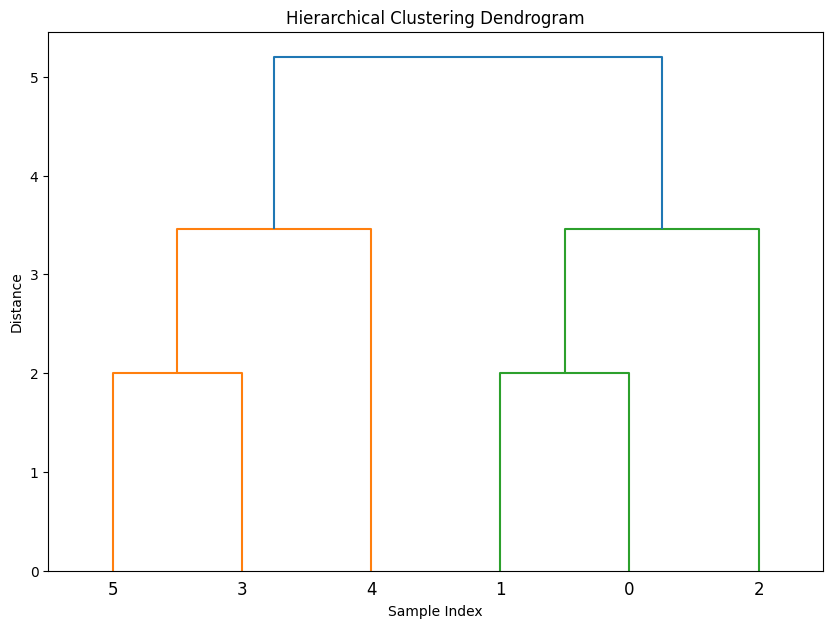

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def hierarchical_clustering(data):
    linked = linkage(data, method='ward')
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()


data = np.array([[1, 2], [1, 4], [1, 0],
                 [4, 2], [4, 4], [4, 0]])

hierarchical_clustering(data)


 # 19. Problem: Implement a function to generate synthetic images using a generative
 adversarial network (GAN). The function should use random noise as input and return
 generated images.

C:\Users\creva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\creva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


C:\Users\creva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch: 0, Discriminator Loss: 0.7099137306213379, Generator Loss: [array(0.79880035, dtype=float32), array(0.79880035, dtype=float32), array(0.3125, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

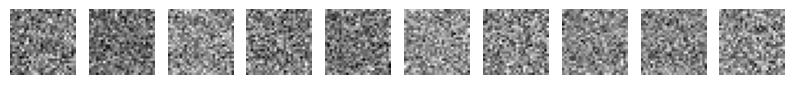

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

def build_generator(latent_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=latent_dim),
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28))
    ])
    return model

def build_discriminator():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_gan(epochs, batch_size, latent_dim):
    # Load and preprocess the MNIST dataset
    (X_train, _), (_, _) = keras.datasets.mnist.load_data()
    X_train = X_train.astype(np.float32) / 255.0

    generator = build_generator(latent_dim)
    discriminator = build_discriminator()

    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)
    gan = keras.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')

    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_images = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

def generate_images(generator, num_images, latent_dim):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(noise)
    return generated_images

latent_dim = 100
train_gan(epochs=100, batch_size=64, latent_dim=latent_dim)


generator = build_generator(latent_dim)
generated_images = generate_images(generator, num_images=10, latent_dim=latent_dim)


plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')
plt.show()


 # 20. Problem: Write a Python function to perform time series forecasting using an ARIMA (Auto Regressive Integrated Moving Average) model, given a sequence of historical data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def time_series_forecasting(data, order, forecast_steps):
    model = ARIMA(data, order=order)
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=forecast_steps)
    return forecast, model_fit

np.random.seed(42)
time = np.arange(100)
data = 10 + 0.5 * time + np.random.normal(scale=5, size=time.shape)

data_series = pd.Series(data)

plt.figure(figsize=(10, 5))
plt.plot(data_series, label='Historical Data')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

p = 1  
d = 1  
q = 1  
order = (p, d, q)

forecast_steps = 10
forecast, model_fit = time_series_forecasting(data_series, order, forecast_steps)

plt.figure(figsize=(10, 5))
plt.plot(data_series, label='Historical Data')
plt.plot(np.arange(len(data_series), len(data_series) + forecast_steps), forecast, label='Forecast', color='red')
plt.title('Time Series Forecasting using ARIMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.axvline(x=len(data_series), color='grey', linestyle='--', label='Forecast Start')
plt.legend()
plt.show()

print("Forecasted Values:")
print(forecast)


ModuleNotFoundError: No module named 'statsmodels'